# 📊 Amazonデータセット EDA（探索的データ分析）

このノートブックでは、Amazonレビューに関する構造・分布・統計・可視化を行い、
モデル構築や整合性学習の前提となるデータ理解を深めることを目的とします。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# グラフの日本語対応やスタイル設定（任意）
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
import pandas as pd
import json
import os

input_path = "../data/raw/Electronics.jsonl"
output_dir = "../data/processed/amazon_csv_chunks"
batch_size = 100_000

os.makedirs(output_dir, exist_ok=True)

buffer = []
chunk_id = 0

with open(input_path, "r") as f:
    for i, line in enumerate(f, start=1):
        buffer.append(json.loads(line))
        if len(buffer) == batch_size:
            chunk_id += 1
            df_chunk = pd.DataFrame(buffer)
            df_chunk.to_csv(f"{output_dir}/chunk_{chunk_id:03d}.csv", index=False)
            print(f"✅ Saved chunk {chunk_id} ({i} rows)")
            buffer.clear()

    if buffer:
        chunk_id += 1
        df_chunk = pd.DataFrame(buffer)
        df_chunk.to_csv(f"{output_dir}/chunk_{chunk_id:03d}.csv", index=False)
        print(f"✅ Saved final chunk {chunk_id} ({i} rows)")


✅ Saved chunk 1 (100000 rows)
✅ Saved chunk 2 (200000 rows)
✅ Saved chunk 3 (300000 rows)
✅ Saved chunk 4 (400000 rows)
✅ Saved chunk 5 (500000 rows)
✅ Saved chunk 6 (600000 rows)
✅ Saved chunk 7 (700000 rows)
✅ Saved chunk 8 (800000 rows)
✅ Saved chunk 9 (900000 rows)
✅ Saved chunk 10 (1000000 rows)
✅ Saved chunk 11 (1100000 rows)
✅ Saved chunk 12 (1200000 rows)
✅ Saved chunk 13 (1300000 rows)
✅ Saved chunk 14 (1400000 rows)
✅ Saved chunk 15 (1500000 rows)
✅ Saved chunk 16 (1600000 rows)
✅ Saved chunk 17 (1700000 rows)
✅ Saved chunk 18 (1800000 rows)
✅ Saved chunk 19 (1900000 rows)
✅ Saved chunk 20 (2000000 rows)
✅ Saved chunk 21 (2100000 rows)
✅ Saved chunk 22 (2200000 rows)
✅ Saved chunk 23 (2300000 rows)
✅ Saved chunk 24 (2400000 rows)
✅ Saved chunk 25 (2500000 rows)
✅ Saved chunk 26 (2600000 rows)
✅ Saved chunk 27 (2700000 rows)
✅ Saved chunk 28 (2800000 rows)
✅ Saved chunk 29 (2900000 rows)
✅ Saved chunk 30 (3000000 rows)
✅ Saved chunk 31 (3100000 rows)
✅ Saved chunk 32 (3200000 

In [4]:
import glob

csv_files = sorted(glob.glob(f"{output_dir}/chunk_*.csv"))
df_all = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

print(f"✅ 全データ結合完了: {df_all.shape[0]} 件")
print(df_all.head())


✅ 全データ結合完了: 43886944 件
   rating                                        title  \
0     3.0            Smells like gasoline! Going back!   
1     1.0      Didn’t work at all lenses loose/broken.   
2     5.0                                   Excellent!   
3     5.0                       Great laptop backpack!   
4     5.0  Best Headphones in the Fifties price range!   

                                                text  \
0  First & most offensive: they reek of gasoline ...   
1  These didn’t work. Idk if they were damaged in...   
2  I love these. They even come with a carry case...   
3  I was searching for a sturdy backpack for scho...   
4  I've bought these headphones three times becau...   

                                              images        asin parent_asin  \
0  [{'small_image_url': 'https://m.media-amazon.c...  B083NRGZMM  B083NRGZMM   
1                                                 []  B07N69T6TM  B07N69T6TM   
2                                                 [

In [5]:
df_all.to_parquet("../data/processed/Electronics.parquet")


: 

In [1]:
import pandas as pd
import glob
import os

csv_dir = "../data/processed/amazon_csv_chunks"
parquet_dir = "../data/processed/amazon_parquet_chunks"
os.makedirs(parquet_dir, exist_ok=True)

csv_files = sorted(glob.glob(f"{csv_dir}/chunk_*.csv"))

for i, csv_file in enumerate(csv_files, start=1):
    df = pd.read_csv(csv_file)
    parquet_file = os.path.join(parquet_dir, f"chunk_{i:03d}.parquet")
    df.to_parquet(parquet_file)
    print(f"✅ {parquet_file} saved")


✅ ../data/processed/amazon_parquet_chunks/chunk_001.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_002.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_003.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_004.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_005.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_006.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_007.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_008.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_009.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_010.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_011.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_012.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_013.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_014.parquet saved
✅ ../data/processed/amazon_parquet_chunks/chunk_015.parquet saved
✅ ../data/

In [2]:
parquet_files = sorted(glob.glob(f"{parquet_dir}/chunk_*.parquet"))

df_all = pd.concat([pd.read_parquet(f) for f in parquet_files], ignore_index=True)

print(f"✅ データ結合完了: {df_all.shape}")
print(df_all.head())


✅ データ結合完了: (43886944, 10)
   rating                                        title  \
0     3.0            Smells like gasoline! Going back!   
1     1.0      Didn’t work at all lenses loose/broken.   
2     5.0                                   Excellent!   
3     5.0                       Great laptop backpack!   
4     5.0  Best Headphones in the Fifties price range!   

                                                text  \
0  First & most offensive: they reek of gasoline ...   
1  These didn’t work. Idk if they were damaged in...   
2  I love these. They even come with a carry case...   
3  I was searching for a sturdy backpack for scho...   
4  I've bought these headphones three times becau...   

                                              images        asin parent_asin  \
0  [{'small_image_url': 'https://m.media-amazon.c...  B083NRGZMM  B083NRGZMM   
1                                                 []  B07N69T6TM  B07N69T6TM   
2                                               

In [3]:
user_counts = df_all["user_id"].value_counts()
one_review_users = (user_counts == 1).sum()
total_users = len(user_counts)
ratio = round(one_review_users / total_users * 100, 2)

print(f"総ユーザ数: {total_users}")
print(f"1件のみのユーザ数: {one_review_users}")
print(f"1件ユーザの割合: {ratio}%")


総ユーザ数: 18286191
1件のみのユーザ数: 10318718
1件ユーザの割合: 56.43%


rating
0.0           2
1.0     5358800
2.0     2257604
3.0     2883065
4.0     5557725
5.0    27829748
Name: count, dtype: int64


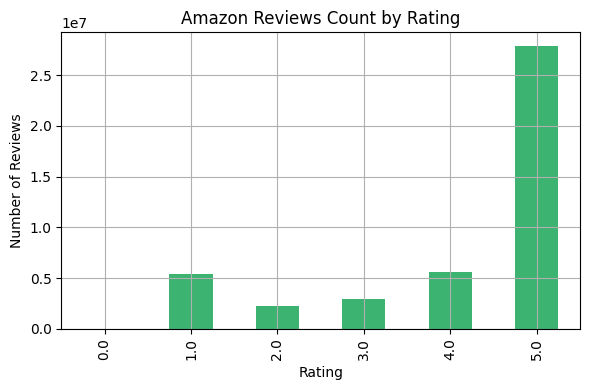

In [4]:
import matplotlib.pyplot as plt

rating_counts = df_all["rating"].value_counts().sort_index()
print(rating_counts)

# 可視化（ヒストグラム）
plt.figure(figsize=(6, 4))
rating_counts.plot(kind="bar", color="mediumseagreen")
plt.title("Amazon Reviews Count by Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# 欠損がある場合に備えて文字列変換
df_all["text"] = df_all["text"].astype(str)

# 文字数計算（新しい列に保存）
df_all["text_length"] = df_all["text"].str.len()

# 統計出力
print(df_all["text_length"].describe())


count    4.388694e+07
mean     2.413274e+02
std      4.193969e+02
min      1.000000e+00
25%      4.800000e+01
50%      1.220000e+02
75%      2.710000e+02
max      3.520800e+04
Name: text_length, dtype: float64


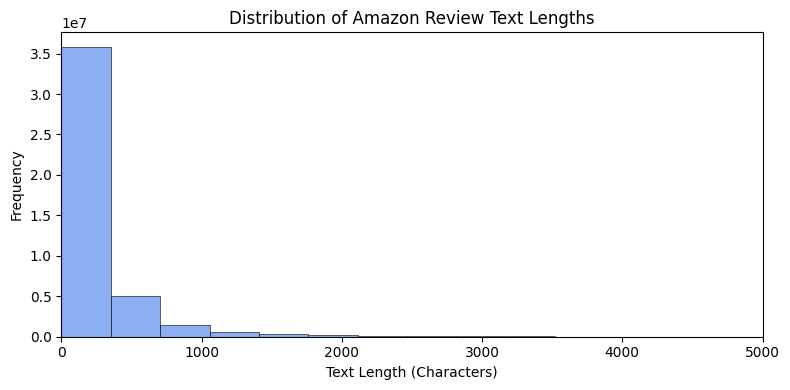

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df_all["text_length"], bins=100, kde=False, color="cornflowerblue")
plt.title("Distribution of Amazon Review Text Lengths")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.xlim(0, 5000)
plt.tight_layout()
plt.show()


/var/folders/lz/4tkhtj69333b7wp6ksdrz57w0000gn/T/ipykernel_16746/1398120531.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amazon_rating_counts["rating"], y=amazon_rating_counts["review_count"], palette="viridis")


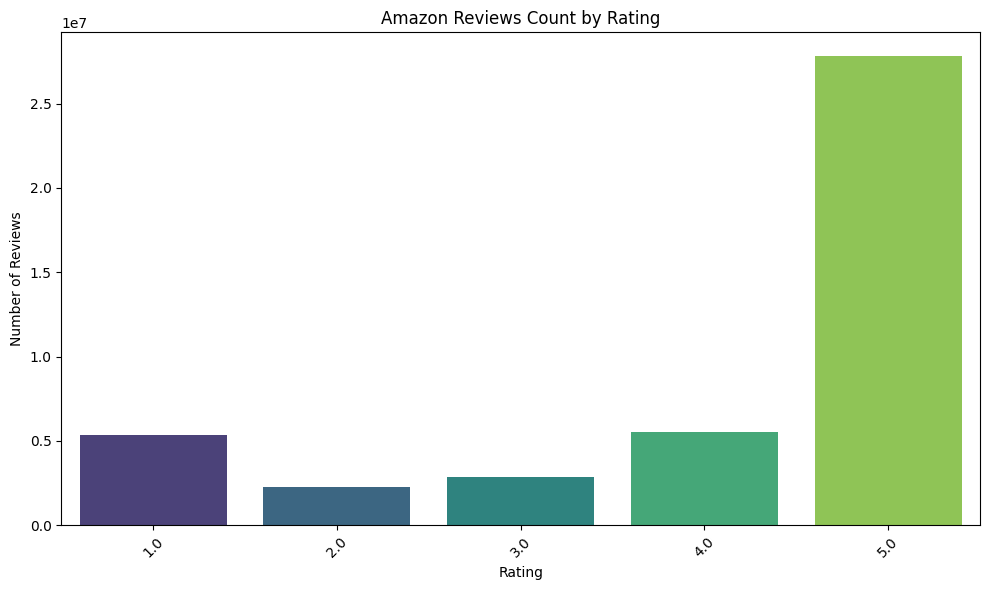

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 提示されたAmazonの評価データ（0.0評価を除外）
amazon_rating_counts = pd.Series({
    1.0: 5358800,
    2.0: 2257604,
    3.0: 2883065,
    4.0: 5557725,
    5.0: 27829748
}).reset_index()
amazon_rating_counts.columns = ["rating", "review_count"]

# 評価値の可視化（Yelpと同じ形式・色・保存パス）
plt.figure(figsize=(10, 6))
sns.barplot(x=amazon_rating_counts["rating"], y=amazon_rating_counts["review_count"], palette="viridis")
plt.title("Amazon Reviews Count by Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../data/processed/amazon_reviews_count_by_rating.png")
plt.show()


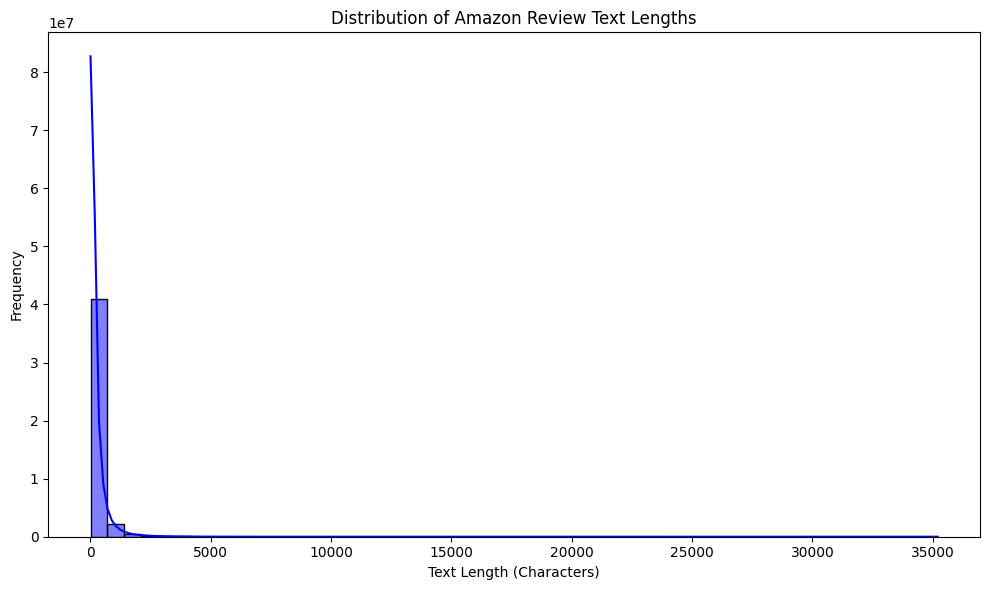

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_all["text_length"], bins=50, kde=True, color="blue")
plt.title("Distribution of Amazon Review Text Lengths")
plt.xlabel("Text Length (Characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../data/processed/amazon_review_text_length_distribution.png")
plt.show()


In [1]:
import pandas as pd
import glob
from tqdm import tqdm

# ---------- 設定 ----------
min_user_interactions = 10
min_item_interactions = 20
max_users = 50000
max_items = 90000

# ---------- データロード ----------
data_path = "../data/processed/amazon_parquet_chunks/*.parquet"
all_files = glob.glob(data_path)

dfs = []
for file in tqdm(all_files, desc="Loading parquet chunks"):
    df = pd.read_parquet(file, columns=["user_id", "parent_asin", "timestamp"])
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)
print(f"Total raw interactions: {len(df_all):,}")

# ---------- フィルタリング ----------
# 1. ユーザ側フィルタ
user_counts = df_all["user_id"].value_counts()
valid_users = user_counts[user_counts >= min_user_interactions].index
df_filtered = df_all[df_all["user_id"].isin(valid_users)]

# 2. アイテム側フィルタ
item_counts = df_filtered["parent_asin"].value_counts()
valid_items = item_counts[item_counts >= min_item_interactions].index
df_filtered = df_filtered[df_filtered["parent_asin"].isin(valid_items)]

# 3. 最大ユーザ・アイテム制限
selected_users = df_filtered["user_id"].drop_duplicates().sample(n=min(max_users, df_filtered["user_id"].nunique()), random_state=42)
df_filtered = df_filtered[df_filtered["user_id"].isin(selected_users)]

selected_items = df_filtered["parent_asin"].drop_duplicates().sample(n=min(max_items, df_filtered["parent_asin"].nunique()), random_state=42)
df_filtered = df_filtered[df_filtered["parent_asin"].isin(selected_items)]

# ---------- 結果出力 ----------
final_user_count = df_filtered["user_id"].nunique()
final_item_count = df_filtered["parent_asin"].nunique()
final_interactions = len(df_filtered)

print(f"After filtering:")
print(f"- Users: {final_user_count:,}")
print(f"- Items: {final_item_count:,}")
print(f"- Interactions: {final_interactions:,}")

# 結果をテーブルでも表示
pd.DataFrame({
    "Metric": ["Users", "Items", "Interactions"],
    "Count": [final_user_count, final_item_count, final_interactions]
})

Loading parquet chunks: 100%|██████████| 439/439 [00:05<00:00, 77.39it/s]


Total raw interactions: 43,886,944
After filtering:
- Users: 50,000
- Items: 75,135
- Interactions: 635,436


,Metric,Count
0,Users,50000
1,Items,75135
2,Interactions,635436
